<a href="https://colab.research.google.com/github/xtliao/PyTorchProjects/blob/main/nn_linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [24]:
# device-agnostic code
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [25]:
# prep the data with defined weight and bias
weight = 0.3
bias = 0.9

X = torch.arange(0,1,0.01).unsqueeze(dim=1)
y = X * weight + bias

X[:5], y[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120]]))

In [26]:
# split the dataset
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

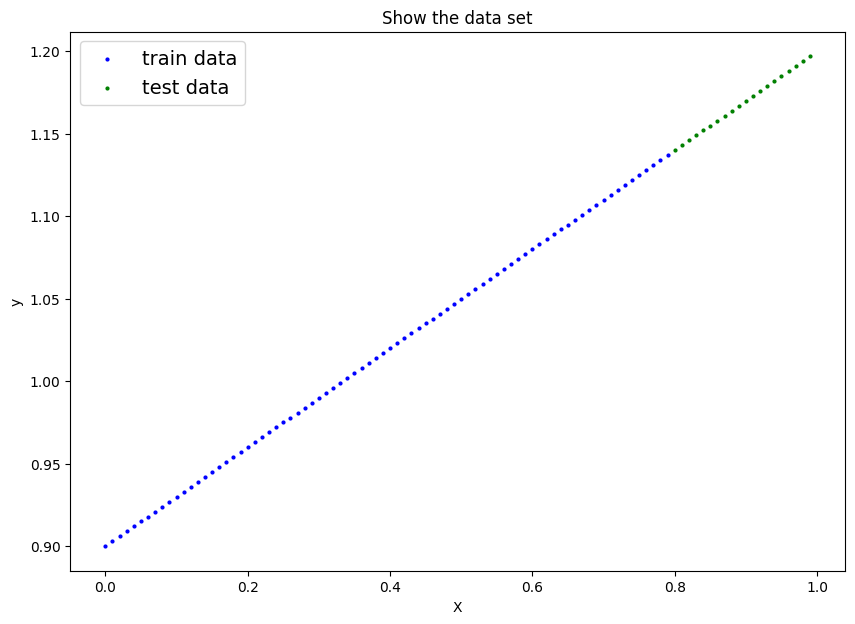

In [27]:
# define the plot function
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, s=4, c="b", label = "train data")
  plt.scatter(test_data, test_labels, s=4, c="g", label = "test data")
  if predictions is not None:
    plt.scatter(test_data, predictions, s=4, c="r", label = "predicted data")
  plt.xlabel("X")
  plt.ylabel("y")
  plt.title("Show the data set")
  plt.legend(prop={"size":14})

plot_predictions()

In [28]:
# define the model class from nn.Module and override the forward method
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(data=torch.randn(1, dtype=torch.float32, requires_grad=True))
    self.bias = nn.Parameter(data=torch.randn(1, dtype=torch.float32, requires_grad=True))

  def forward(self, x):
    return self.weights * x + self.bias

In [29]:
model = LinearRegressionModel()
model, model.state_dict()

(LinearRegressionModel(),
 OrderedDict([('weights', tensor([0.8735])), ('bias', tensor([-1.3742]))]))

In [30]:
model.to(device)
X_train.to(device)
y_train.to(device)
X_test.to(device)
y_test.to(device)

tensor([[1.1400],
        [1.1430],
        [1.1460],
        [1.1490],
        [1.1520],
        [1.1550],
        [1.1580],
        [1.1610],
        [1.1640],
        [1.1670],
        [1.1700],
        [1.1730],
        [1.1760],
        [1.1790],
        [1.1820],
        [1.1850],
        [1.1880],
        [1.1910],
        [1.1940],
        [1.1970]], device='cuda:0')

Epoch:   0, Train loss: 0.25107345, Test loss: 0.64566946
Epoch:  50, Train loss: 0.13853566, Test loss: 0.35978088
Epoch: 100, Train loss: 0.11897151, Test loss: 0.28191301
Epoch: 150, Train loss: 0.10181417, Test loss: 0.23988728
Epoch: 200, Train loss: 0.08468494, Test loss: 0.19958131
Epoch: 250, Train loss: 0.06755668, Test loss: 0.15893145
Epoch: 300, Train loss: 0.05042844, Test loss: 0.11828165
Epoch: 350, Train loss: 0.03329902, Test loss: 0.07797831
Epoch: 400, Train loss: 0.01617054, Test loss: 0.03733138
Epoch: 450, Train loss: 0.00849378, Test loss: 0.00163245

************************************************
The model's parameters are as below:
OrderedDict([('weights', tensor([0.2932])), ('bias', tensor([0.8942]))])
The dataset's parameters are as below:
weight: 0.3, bias: 0.9


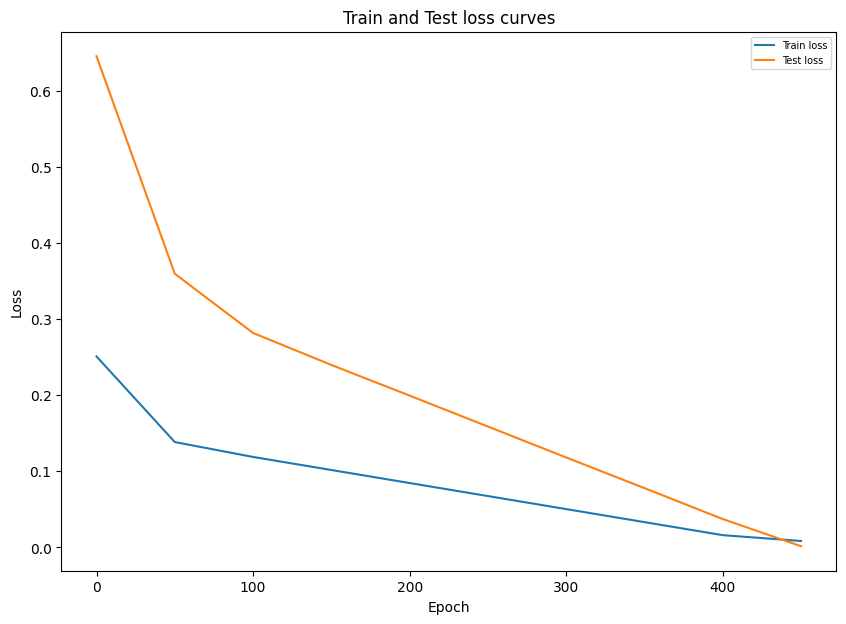

In [31]:
# Training and test loop
epoch_count = []
train_loss_values =[]
test_loss_values = []

torch.manual_seed(37)
model = LinearRegressionModel()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

epochs = 500

for epoch in range(epochs):
  model.train()
  y_pred = model(X_train)
  train_loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  if epoch % 50 == 0:
    model.eval()
    with torch.inference_mode():
      y_eval = model(X_test)
      test_loss = loss_fn(y_eval, y_test)

    epoch_count.append(epoch)
    train_loss_values.append(train_loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch:3n}, Train loss: {train_loss:.8f}, Test loss: {test_loss:.8f}")

plt.figure(figsize=(10,7))
plt.plot(epoch_count, train_loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.legend(prop={"size": 7})
plt.title ("Train and Test loss curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")

print()
print("************************************************")
print(f"The model's parameters are as below:")
print(model.state_dict())
print(f"The dataset's parameters are as below:")
print(f"weight: {weight}, bias: {bias}")

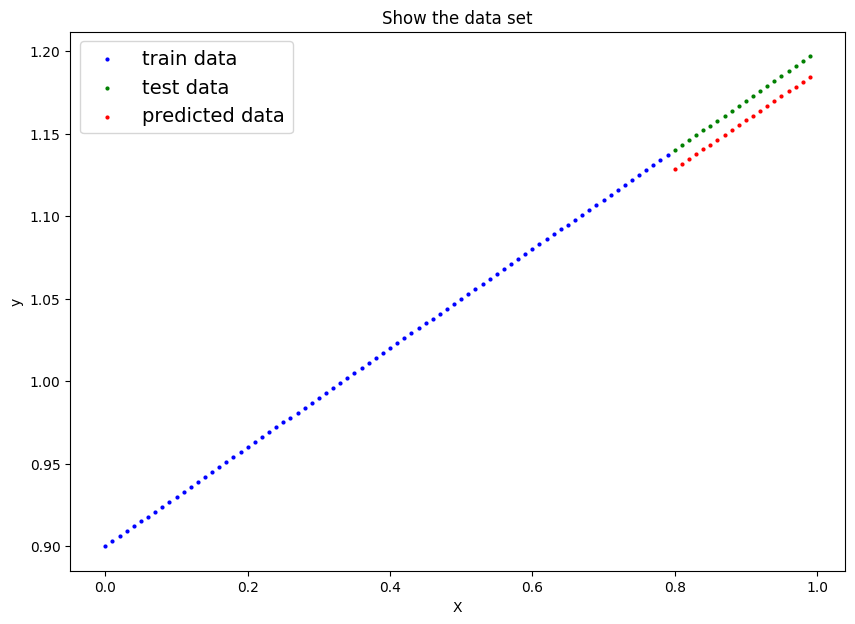

In [32]:
# test the new model
model.eval()
with torch.inference_mode():
  y_preds = model(X_test)

plot_predictions(predictions=y_preds.cpu())

In [33]:
# Save model state_dict
from pathlib import Path

MODEl_PATH = Path("models")
MODEl_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "nn_linearregression_0.pth"
MODEL_SAVE_PATH = MODEl_PATH / MODEL_NAME

print(f"Saving model state_dict to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)


Saving model state_dict to: models/nn_linearregression_0.pth


In [34]:
# Load saved state_dict into new model
new_model = LinearRegressionModel()
new_model.load_state_dict(torch.load(f:=MODEL_SAVE_PATH))
new_model.to(device)
new_model.state_dict()

OrderedDict([('weights', tensor([0.2932], device='cuda:0')),
             ('bias', tensor([0.8942], device='cuda:0'))])

In [35]:
# Eval the new model
new_model.eval()
with torch.inference_mode():
  new_preds = new_model(X_test.to(device))

new_preds.cpu() == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])